In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import json

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

import time

%matplotlib inline

In [6]:
wine = pd.read_csv("../data/wineQualityReds.csv")
del wine["Unnamed: 0"]
wine.sample(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
910,9.3,0.380,0.48,3.8,0.132,3.0,11.0,0.99577,3.23,0.57,13.2,6
293,6.9,0.360,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6
884,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6
589,10.2,0.290,0.49,2.6,0.059,5.0,13.0,0.99760,3.05,0.74,10.5,7
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6
765,9.2,0.670,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,6
1136,10.4,0.520,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6
1286,7.1,0.160,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,12.4,6
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.99620,3.44,0.58,10.7,5


In [3]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
wine.columns[[6, 10]]

Index(['total.sulfur.dioxide', 'alcohol'], dtype='object')

In [5]:
y = np.where(wine.quality == 5, 1, 0)
X = wine.iloc[:, :-1].values
X = X[:, [6, 10]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [6]:
pd.Series(y).value_counts()

0    918
1    681
dtype: int64

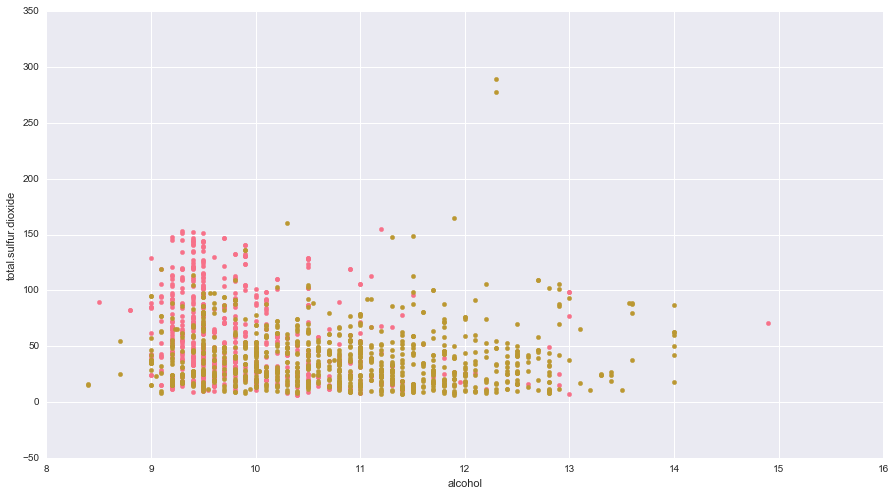

In [7]:
plt.figure(figsize=(15, 8))
colors = sns.color_palette("husl")
features = ["alcohol", "total.sulfur.dioxide"]
for i, v in enumerate(pd.Series(y).unique()):
    df = wine[y == v]
    plt.scatter(df[features[0]], df[features[1]], color = colors[i])
    
plt.xlabel(features[0])
plt.ylabel(features[1])

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.69791666666666663

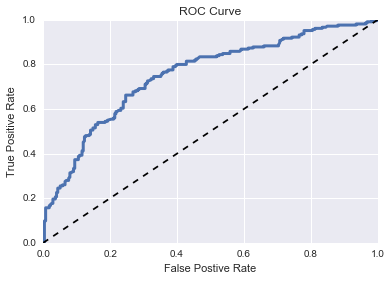

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, [1]])

plt.plot(fpr, tpr, linewidth = 3)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [10]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:, [1]])

0.75313476840011362

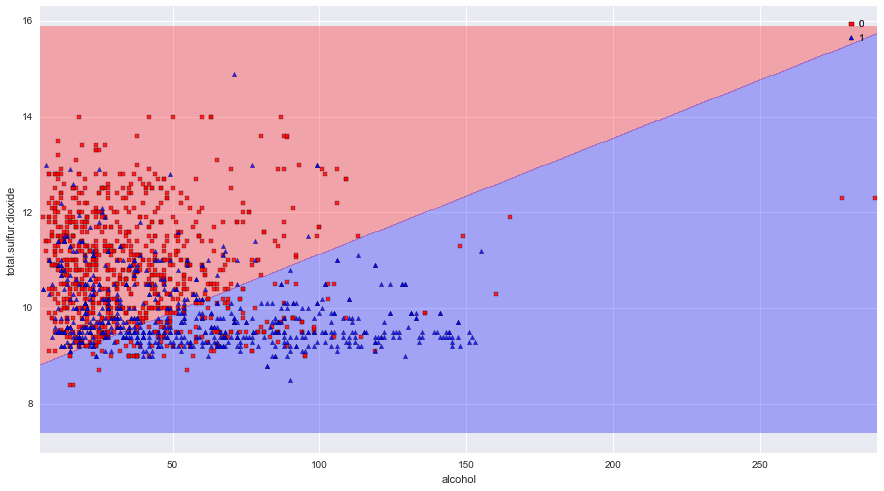

In [11]:
plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, lr)
plt.xlabel(features[0])
plt.ylabel(features[1])

# Building model on all features

In [65]:
y = np.where(wine.quality == 5, 1, 0)
X = wine.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.74375000000000002

In [67]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X, y)
tree.score(X_test, y_test)

0.76458333333333328

# Find feature importance

In [73]:
feature_importances = list(zip(wine.columns[:-1], tree.feature_importances_))
feature_importances = pd.DataFrame(feature_importances).sort_values(1, ascending = False)
feature_importances

,0,1
10,alcohol,0.629560
6,total.sulfur.dioxide,0.145099
9,sulphates,0.109528
1,volatile.acidity,0.055004
3,residual.sugar,0.021948
8,pH,0.016739
5,free.sulfur.dioxide,0.012526
0,fixed.acidity,0.009597
2,citric.acid,0.000000
4,chlorides,0.000000


# Scaling back the model to 2 features to show decision region

Accuracy:  0.727083333333


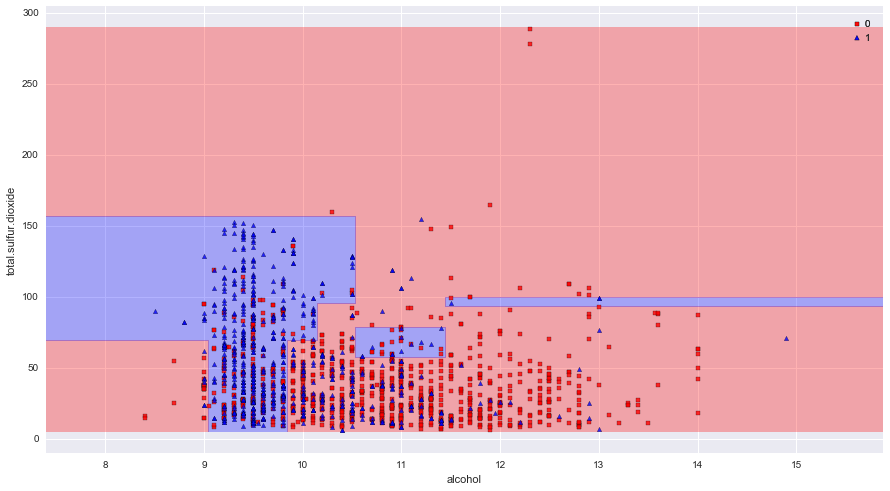

In [77]:
features = ["alcohol", "total.sulfur.dioxide"]
X = wine[features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
print("Accuracy: ", tree.score(X_test, y_test))

plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, tree)
plt.xlabel(features[0])
plt.ylabel(features[1])

# Random Forest

Accuracy: 0.735416666667


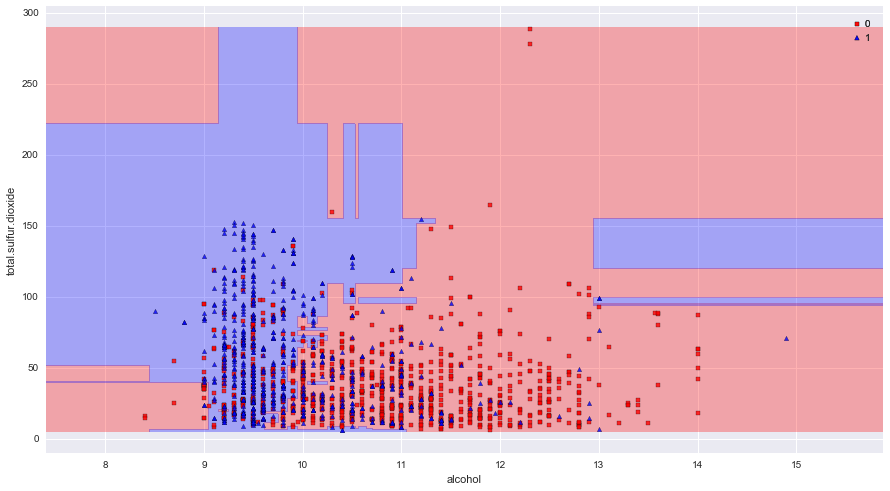

In [41]:
forest = RandomForestClassifier(max_depth=4)
forest.fit(X_train, y_train)
print("Accuracy:", forest.score(X_test, y_test))



plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, forest)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accuracy:  0.683333333333


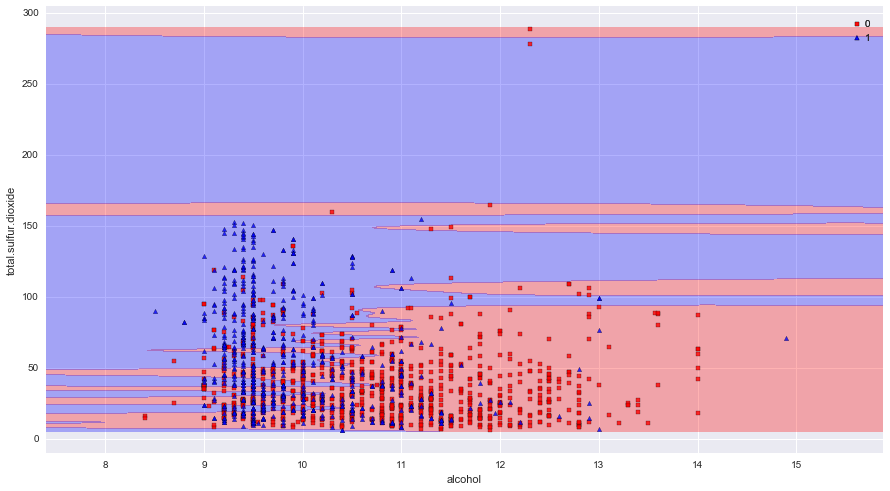

In [46]:
svc = SVC(gamma=0.1, kernel="rbf", cache_size = 5000)
svc.fit(X_train, y_train)
print("Accuracy: ", svc.score(X_test, y_test))


plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, svc)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [50]:
start = time.time()
param_grid = [
    {
        "gamma": 10 ** np.linspace(-1, 1, 10),
        "C": 10 ** np.linspace(-5, 5, 5),
        "kernel": ["rbf", "linear"]
    }
]
gs = GridSearchCV(cv=5, param_grid=param_grid, scoring="accuracy", 
                  estimator = SVC(cache_size = 5000), verbose=True)

gs.fit(X_train, y_train)

print("Time taken", time.time() - start)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

Accuracy:  0.675


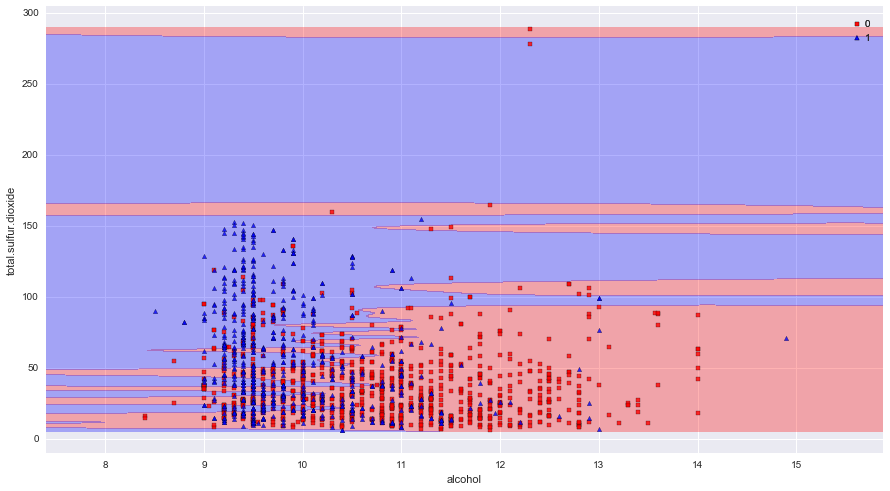

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy: ", knn.score(X_test, y_test))

plt.figure(figsize=(15, 8))
plot_decision_regions(X, y, svc)
plt.xlabel(features[0])
plt.ylabel(features[1])

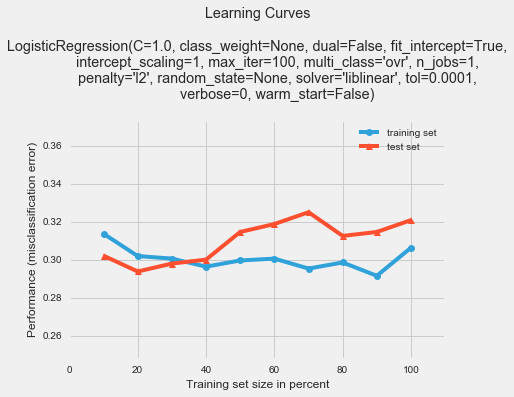

In [86]:
from mlxtend.plotting import plot_learning_curves
p = plot_learning_curves(X_train, y_train, X_test, y_test, lr)

In [85]:
plot_learning_curves??

In [7]:
y = np.where(wine.quality == 5, 1, 0)
X = wine.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [8]:
X_train.shape

(1119, 11)

In [9]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [14]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2, random_state=100)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [19]:
pca.explained_variance_ratio_

array([ 0.28621855,  0.17779892,  0.14188857,  0.11111585])

In [21]:
from sklearn.svm import SVC

In [35]:
svc = SVC(C=1, gamma=1, kernel = "rbf", random_state=100)
svc.fit(X_train_std, y_train)

svc.score(X_test_std, y_test)

0.76666666666666672